# Protein Folding using HP Model (Simulated Annealing)

### **Benchmark HP Sequences 2D Square Lattice**

To evaluate the folding capability of Simulated Annealing under the HP model, we selected 9 benchmark sequences from the literature. These sequences are chosen based on:

- Varying sequence lengths (20 to 89 residues)
- Increasing folding complexity
- Known optimal energies for validation

The table below summarizes the sequences used:


These sequences are commonly referenced in literature and include known optimal energies for comparison.

| ID  | Sequence                                                                 | Length | Known Optimal Energy |
|-----|--------------------------------------------------------------------------|--------|-----------------------|
| 1   | HPHPPHHPHPPHPHHPPHPH                                                    | 20     | -9                    |
| 2   | HHPPHPPHPPHPPHPPHPPHPPHH                                                | 24     | -9                    |
| 3   | PPHPPHHPPPPHHPPPPHHPPPPHH                                              | 27     | -8                    |
| 4   | PPPHHPPHHPPPPPHHHHHHHPPHHPPPPHHPPHPP                                   | 36     | -14                   |
| 5   | PPHPPHHPPHHPPPPPHHHHHHHHHHPPPPPPHHPPHHPPHPPHHHHH                       | 48     | -23                   |
| 6   | HHPHPHPHPHHHHPHPPPHPPPHPPPPHPPPHPPPHPHHHHPHPHPHPHH                     | 60     | -36                   |
| 7   | PPHHHPHHHHHHHHPPPHHHHHHHHHHPHPPPHHHHHHHHHHHHPPPPHHHHHHPHHPHP           | 71     | -47                   |
| 8   | HHHHHHHHHHHHPHPHPPHHPPHHPPHPPHHPPHHPPHPPHHPPHHPPHPHPHHHHHHHHHHHH       | 81     | -53                   |
| 9   | HHHHPPPPHHHHHHHHHHHHPPPPPPHHHHHHHHHHHHPPPHHHHHHHHHHHHPPPHHHHHHHHHHHHPPPHPPHHPPHHPPHPH | 89     | -57                   |

These sequences are folded using Simulated Annealing with various parameters to evaluate algorithmic efficiency and accuracy compared to the known optimal energies.


### **Id 1 Sequence**


Simulated Annealing on 2D Square Lattice
2D square Lattice: Loading...
Found in Run: 4

Best SA Energy Across All Runs: -8
Known Optimal Energy: -9
Deviation from Optimal: 1

Total Runtime: 0.054 minutes


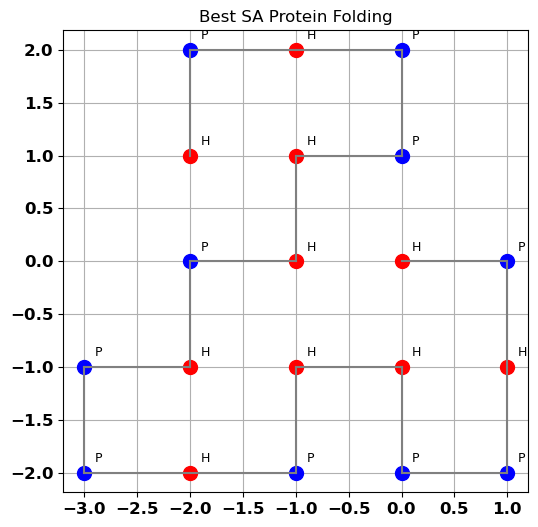

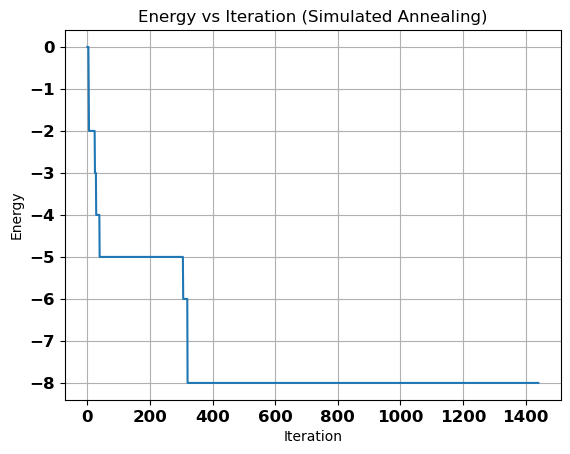

In [ ]:
# -*- coding: utf-8 -*-
"""
Created on Fri Aug  1 14:41:16 2025

@author: Yassin
"""

import random
import matplotlib.pyplot as plt
import math
import sys
import time

# Directions for 2D lattice: Up, Right, Down, Left
square_directions = [(0, 1), (1, 0), (0, -1), (-1, 0)]

# Known optimal energies for reference
optimal_2d = {
    20: -9, 
    24: -9, 
    25: -8, 
    36: -14,
    48: -23, 
    50: -21, 
    60: -36,
    64: -42, 
    85: -53
}

# Coordinates
def get_coordinates(square_direction):
    x, y = 0, 0
    coords = [(x, y)]
    for dx, dy in square_direction:
        x += dx
        y += dy
        coords.append((x, y))
    return coords

# Energy Function
def calculate_energy(sequence, coords):
    energy = 0
    positions = {coord: i for i, coord in enumerate(coords)}
    for i in range(len(sequence)):
        if sequence[i] != 'H':
            continue
        x, y = coords[i]
        for dx, dy in square_directions:
            nx, ny = x + dx, y + dy
            j = positions.get((nx, ny))
            if j is not None and sequence[j] == 'H' and abs(i - j) > 1:
                energy -= 1
    return energy // 2

# Mutation
def mutate(square_direction):
    new_direction = square_direction[:]
    i = random.randint(0, len(square_direction) - 1)
    new_dir = random.choice(square_directions)
    while new_dir == new_direction[i]:
        new_dir = random.choice(square_directions)
    new_direction[i] = new_dir
    return new_direction

# Main Block Simulated Annealing 
def simulated_annealing(sequence, iterations, T0, alpha):
    # Ensure valid SAW initial direction
    while True:
        square_direction = random.choices(square_directions, k=len(sequence) - 1)
        coords = get_coordinates(square_direction)
        if len(set(coords)) == len(coords):
            break

    best_coords = coords
    best_energy = calculate_energy(sequence, coords)
    energy_list = [best_energy]
    T = T0

    for _ in range(iterations):
        new_direction = mutate(square_direction)
        new_coords = get_coordinates(new_direction)

        if len(set(new_coords)) != len(new_coords):
            continue  # ensure SAW

        new_energy = calculate_energy(sequence, new_coords)

        # Optional sanity check (based on known optimum)
        known_min = optimal_2d.get(len(sequence), -100)
        if new_energy < known_min - 2:
            print(f"WARNING: Energy too low ({new_energy}) — skipping")
            continue

        delta_E = new_energy - best_energy
        if delta_E < 0 or random.random() < math.exp(-delta_E / T):
            square_direction = new_direction
            best_coords = new_coords
            best_energy = new_energy

        energy_list.append(best_energy)
        T *= alpha

    return best_coords, best_energy, energy_list

# Plot
def plot_energy_curve(energy_log):
    plt.plot(energy_log)
    plt.title("Energy vs Iteration (Simulated Annealing)")
    plt.xlabel("Iteration")
    plt.ylabel("Energy")
    plt.xticks(fontsize = 12, fontweight = 'bold')
    plt.yticks(fontsize = 12, fontweight = 'bold')
    plt.grid(True)
    plt.show()


# Fold Visualization
def visualize_fold(coords, sequence, title="Protein Folding"):
    xs, ys = zip(*coords)
    plt.figure(figsize=(6, 6))
    for i, (x, y) in enumerate(coords):
        color = 'red' if sequence[i] == 'H' else 'blue'
        plt.plot(x, y, 'o', color=color, markersize=10)
        plt.text(x + 0.1, y + 0.1, sequence[i], fontsize=9)
        if i > 0:
            x0, y0 = coords[i - 1]
            plt.plot([x0, x], [y0, y], 'gray')
    plt.axis('equal')
    plt.xticks(fontsize = 12, fontweight = 'bold')
    plt.yticks(fontsize = 12, fontweight = 'bold')
    plt.grid(True)
    plt.title(title)
    plt.show()


# Main Program
if __name__ == "__main__":
    sequence = "".join(input("Enter the sequence (only H and P): ").upper().split())

    if not sequence or any(c not in "HP" for c in sequence):
        print("Invalid sequence. Use only 'H' and 'P'.")
        sys.exit()
        
    initial_temperature = 1.0
    cooling_rate = 0.95     # Slower cooling for better folding (α = cooling rate)
    iterations = 5000        # Faster
    runs = 50               # More runs for better chance
    best_overall_energy = float('inf')
    best_overall_coords = None
    best_overall_log = None
    best_run_index = -1

    lattice_type = int(input("Enter 1 for square 2D lattice: ").strip())
    if lattice_type != 1:
        print("Thank you. Exiting.")
        sys.exit()

    print("\nSimulated Annealing on 2D Square Lattice")
    
    length = len(sequence)
    if length in optimal_2d:
        print("2D square Lattice: Loading...")
        
    start_time = time.time()
    
    for r in range(runs):
        coords, energy, log = simulated_annealing(sequence, iterations, initial_temperature, cooling_rate)
        if energy < best_overall_energy:
            best_overall_energy = energy
            best_overall_coords = coords
            best_overall_log = log
            best_run_index = r + 1
            
    end_time = time.time()
    total_time = (end_time - start_time) / 60
      
    print("Found in Run:", best_run_index)
    print("\nBest SA Energy Across All Runs:", best_overall_energy)
    
    if length in optimal_2d:
        optimal = optimal_2d[length]
        deviation = best_overall_energy - optimal
        print("Known Optimal Energy:", optimal)
        print("Deviation from Optimal:", deviation)
    else:
        print("No known optimal energy for sequence length:", length)
        
    print(f"\nTotal Runtime: {total_time:.3f} minutes")
    
    visualize_fold(best_overall_coords, sequence, title="Best SA Protein Folding")
    plot_energy_curve(best_overall_log)
    
    

### **Id 2 Sequence**


Simulated Annealing on 2D Square Lattice
2D square Lattice: Loading...
Found in Run: 13

Best SA Energy Across All Runs: -8
Known Optimal Energy: -9
Deviation from Optimal: 1

Total Runtime: 0.095 minutes


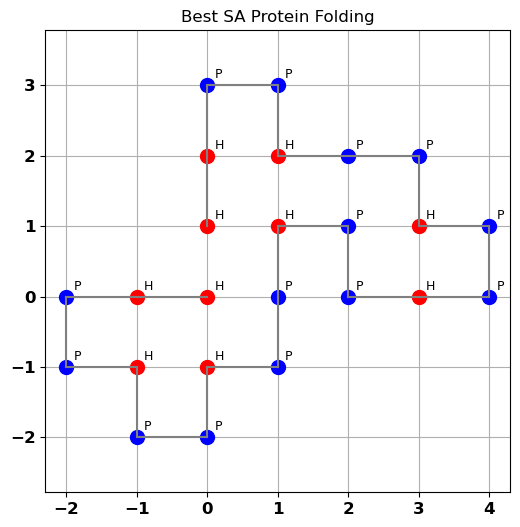

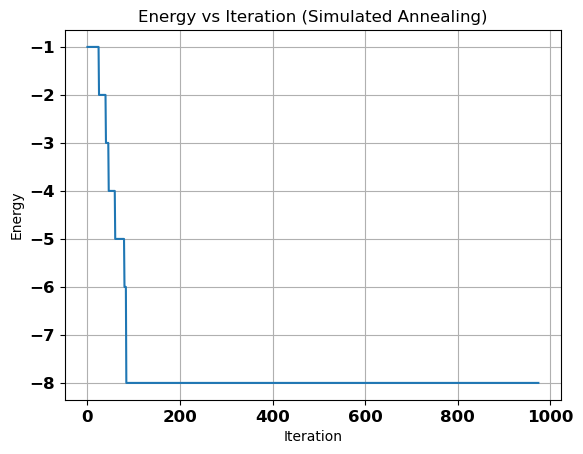

In [ ]:
# -*- coding: utf-8 -*-
"""
Created on Fri Aug  1 14:41:16 2025

@author: Yassin
"""

import random
import matplotlib.pyplot as plt
import math
import sys
import time

# Directions for 2D lattice: Up, Right, Down, Left
square_directions = [(0, 1), (1, 0), (0, -1), (-1, 0)]

# Known optimal energies for reference
optimal_2d = {
    20: -9, 
    24: -9, 
    25: -8, 
    36: -14,
    48: -23, 
    50: -21, 
    60: -36,
    64: -42, 
    85: -53
}

# Coordinates
def get_coordinates(square_direction):
    x, y = 0, 0
    coords = [(x, y)]
    for dx, dy in square_direction:
        x += dx
        y += dy
        coords.append((x, y))
    return coords

# Energy Function
def calculate_energy(sequence, coords):
    energy = 0
    positions = {coord: i for i, coord in enumerate(coords)}
    for i in range(len(sequence)):
        if sequence[i] != 'H':
            continue
        x, y = coords[i]
        for dx, dy in square_directions:
            nx, ny = x + dx, y + dy
            j = positions.get((nx, ny))
            if j is not None and sequence[j] == 'H' and abs(i - j) > 1:
                energy -= 1
    return energy // 2

# Mutation
def mutate(square_direction):
    new_direction = square_direction[:]
    i = random.randint(0, len(square_direction) - 1)
    new_dir = random.choice(square_directions)
    while new_dir == new_direction[i]:
        new_dir = random.choice(square_directions)
    new_direction[i] = new_dir
    return new_direction

# Main Block Simulated Annealing 
def simulated_annealing(sequence, iterations, T0, alpha):
    # Ensure valid SAW initial direction
    while True:
        square_direction = random.choices(square_directions, k=len(sequence) - 1)
        coords = get_coordinates(square_direction)
        if len(set(coords)) == len(coords):
            break

    best_coords = coords
    best_energy = calculate_energy(sequence, coords)
    energy_list = [best_energy]
    T = T0

    for _ in range(iterations):
        new_direction = mutate(square_direction)
        new_coords = get_coordinates(new_direction)

        if len(set(new_coords)) != len(new_coords):
            continue  # ensure SAW

        new_energy = calculate_energy(sequence, new_coords)

        # Optional sanity check (based on known optimum)
        known_min = optimal_2d.get(len(sequence), -100)
        if new_energy < known_min - 2:
            print(f"WARNING: Energy too low ({new_energy}) — skipping")
            continue

        delta_E = new_energy - best_energy
        if delta_E < 0 or random.random() < math.exp(-delta_E / T):
            square_direction = new_direction
            best_coords = new_coords
            best_energy = new_energy

        energy_list.append(best_energy)
        T *= alpha

    return best_coords, best_energy, energy_list

# Plot
def plot_energy_curve(energy_log):
    plt.plot(energy_log)
    plt.title("Energy vs Iteration (Simulated Annealing)")
    plt.xlabel("Iteration")
    plt.ylabel("Energy")
    plt.xticks(fontsize = 12, fontweight = 'bold')
    plt.yticks(fontsize = 12, fontweight = 'bold')
    plt.grid(True)
    plt.show()


# Fold Visualization
def visualize_fold(coords, sequence, title="Protein Folding"):
    xs, ys = zip(*coords)
    plt.figure(figsize=(6, 6))
    for i, (x, y) in enumerate(coords):
        color = 'red' if sequence[i] == 'H' else 'blue'
        plt.plot(x, y, 'o', color=color, markersize=10)
        plt.text(x + 0.1, y + 0.1, sequence[i], fontsize=9)
        if i > 0:
            x0, y0 = coords[i - 1]
            plt.plot([x0, x], [y0, y], 'gray')
    plt.axis('equal')
    plt.xticks(fontsize = 12, fontweight = 'bold')
    plt.yticks(fontsize = 12, fontweight = 'bold')
    plt.grid(True)
    plt.title(title)
    plt.show()


# Main Program
if __name__ == "__main__":
    sequence = "".join(input("Enter the sequence (only H and P): ").upper().split())

    if not sequence or any(c not in "HP" for c in sequence):
        print("Invalid sequence. Use only 'H' and 'P'.")
        sys.exit()
        
    initial_temperature = 1.0
    cooling_rate = 0.95     # Slower cooling for better folding (α = cooling rate)
    iterations = 5000        # Faster
    runs = 50               # More runs for better chance
    best_overall_energy = float('inf')
    best_overall_coords = None
    best_overall_log = None
    best_run_index = -1

    lattice_type = int(input("Enter 1 for square 2D lattice: ").strip())
    if lattice_type != 1:
        print("Thank you. Exiting.")
        sys.exit()

    print("\nSimulated Annealing on 2D Square Lattice")
    
    length = len(sequence)
    if length in optimal_2d:
        print("2D square Lattice: Loading...")
        
    start_time = time.time()
    
    for r in range(runs):
        coords, energy, log = simulated_annealing(sequence, iterations, initial_temperature, cooling_rate)
        if energy < best_overall_energy:
            best_overall_energy = energy
            best_overall_coords = coords
            best_overall_log = log
            best_run_index = r + 1
            
    end_time = time.time()
    total_time = (end_time - start_time) / 60
      
    print("Found in Run:", best_run_index)
    print("\nBest SA Energy Across All Runs:", best_overall_energy)
    
    if length in optimal_2d:
        optimal = optimal_2d[length]
        deviation = best_overall_energy - optimal
        print("Known Optimal Energy:", optimal)
        print("Deviation from Optimal:", deviation)
    else:
        print("No known optimal energy for sequence length:", length)
        
    print(f"\nTotal Runtime: {total_time:.3f} minutes")
    
    visualize_fold(best_overall_coords, sequence, title="Best SA Protein Folding")
    plot_energy_curve(best_overall_log)
    
    

### **Id 3 Sequence**


Simulated Annealing on 2D Square Lattice
2D square Lattice: Loading...
Found in Run: 11

Best SA Energy Across All Runs: -7
Known Optimal Energy: -8
Deviation from Optimal: 1

Total Runtime: 0.095 minutes


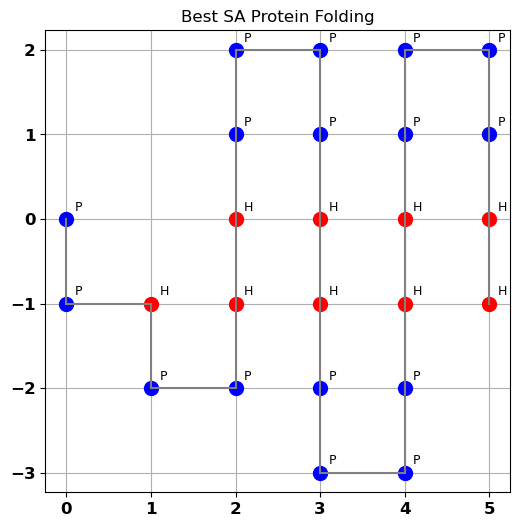

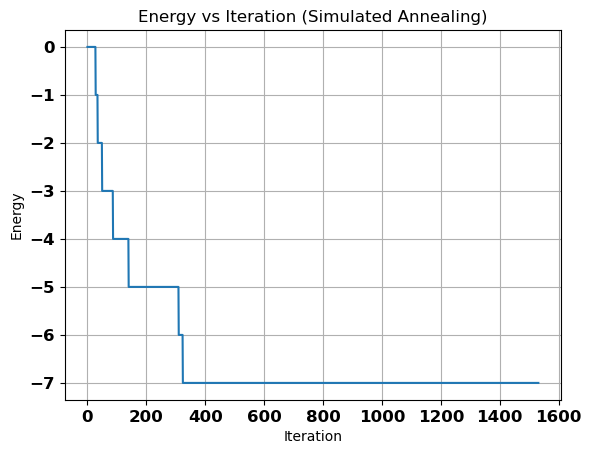

In [ ]:
# -*- coding: utf-8 -*-
"""
Created on Fri Aug  1 14:41:16 2025

@author: Yassin
"""

import random
import matplotlib.pyplot as plt
import math
import sys
import time

# Directions for 2D lattice: Up, Right, Down, Left
square_directions = [(0, 1), (1, 0), (0, -1), (-1, 0)]

# Known optimal energies for reference
optimal_2d = {
    20: -9, 
    24: -9, 
    25: -8, 
    36: -14,
    48: -23, 
    50: -21, 
    60: -36,
    64: -42, 
    85: -53
}

# Coordinates
def get_coordinates(square_direction):
    x, y = 0, 0
    coords = [(x, y)]
    for dx, dy in square_direction:
        x += dx
        y += dy
        coords.append((x, y))
    return coords

# Energy Function
def calculate_energy(sequence, coords):
    energy = 0
    positions = {coord: i for i, coord in enumerate(coords)}
    for i in range(len(sequence)):
        if sequence[i] != 'H':
            continue
        x, y = coords[i]
        for dx, dy in square_directions:
            nx, ny = x + dx, y + dy
            j = positions.get((nx, ny))
            if j is not None and sequence[j] == 'H' and abs(i - j) > 1:
                energy -= 1
    return energy // 2

# Mutation
def mutate(square_direction):
    new_direction = square_direction[:]
    i = random.randint(0, len(square_direction) - 1)
    new_dir = random.choice(square_directions)
    while new_dir == new_direction[i]:
        new_dir = random.choice(square_directions)
    new_direction[i] = new_dir
    return new_direction

# Main Block Simulated Annealing 
def simulated_annealing(sequence, iterations, T0, alpha):
    # Ensure valid SAW initial direction
    while True:
        square_direction = random.choices(square_directions, k=len(sequence) - 1)
        coords = get_coordinates(square_direction)
        if len(set(coords)) == len(coords):
            break

    best_coords = coords
    best_energy = calculate_energy(sequence, coords)
    energy_list = [best_energy]
    T = T0

    for _ in range(iterations):
        new_direction = mutate(square_direction)
        new_coords = get_coordinates(new_direction)

        if len(set(new_coords)) != len(new_coords):
            continue  # ensure SAW

        new_energy = calculate_energy(sequence, new_coords)

        # Optional sanity check (based on known optimum)
        known_min = optimal_2d.get(len(sequence), -100)
        if new_energy < known_min - 2:
            print(f"WARNING: Energy too low ({new_energy}) — skipping")
            continue

        delta_E = new_energy - best_energy
        if delta_E < 0 or random.random() < math.exp(-delta_E / T):
            square_direction = new_direction
            best_coords = new_coords
            best_energy = new_energy

        energy_list.append(best_energy)
        T *= alpha

    return best_coords, best_energy, energy_list

# Plot
def plot_energy_curve(energy_log):
    plt.plot(energy_log)
    plt.title("Energy vs Iteration (Simulated Annealing)")
    plt.xlabel("Iteration")
    plt.ylabel("Energy")
    plt.xticks(fontsize = 12, fontweight = 'bold')
    plt.yticks(fontsize = 12, fontweight = 'bold')
    plt.grid(True)
    plt.show()


# Fold Visualization
def visualize_fold(coords, sequence, title="Protein Folding"):
    xs, ys = zip(*coords)
    plt.figure(figsize=(6, 6))
    for i, (x, y) in enumerate(coords):
        color = 'red' if sequence[i] == 'H' else 'blue'
        plt.plot(x, y, 'o', color=color, markersize=10)
        plt.text(x + 0.1, y + 0.1, sequence[i], fontsize=9)
        if i > 0:
            x0, y0 = coords[i - 1]
            plt.plot([x0, x], [y0, y], 'gray')
    plt.axis('equal')
    plt.xticks(fontsize = 12, fontweight = 'bold')
    plt.yticks(fontsize = 12, fontweight = 'bold')
    plt.grid(True)
    plt.title(title)
    plt.show()


# Main Program
if __name__ == "__main__":
    sequence = "".join(input("Enter the sequence (only H and P): ").upper().split())

    if not sequence or any(c not in "HP" for c in sequence):
        print("Invalid sequence. Use only 'H' and 'P'.")
        sys.exit()
        
    initial_temperature = 1.0
    cooling_rate = 0.95     # Slower cooling for better folding (α = cooling rate)
    iterations = 5000        # Faster
    runs = 50               # More runs for better chance
    best_overall_energy = float('inf')
    best_overall_coords = None
    best_overall_log = None
    best_run_index = -1

    lattice_type = int(input("Enter 1 for square 2D lattice: ").strip())
    if lattice_type != 1:
        print("Thank you. Exiting.")
        sys.exit()

    print("\nSimulated Annealing on 2D Square Lattice")
    
    length = len(sequence)
    if length in optimal_2d:
        print("2D square Lattice: Loading...")
        
    start_time = time.time()
    
    for r in range(runs):
        coords, energy, log = simulated_annealing(sequence, iterations, initial_temperature, cooling_rate)
        if energy < best_overall_energy:
            best_overall_energy = energy
            best_overall_coords = coords
            best_overall_log = log
            best_run_index = r + 1
            
    end_time = time.time()
    total_time = (end_time - start_time) / 60
      
    print("Found in Run:", best_run_index)
    print("\nBest SA Energy Across All Runs:", best_overall_energy)
    
    if length in optimal_2d:
        optimal = optimal_2d[length]
        deviation = best_overall_energy - optimal
        print("Known Optimal Energy:", optimal)
        print("Deviation from Optimal:", deviation)
    else:
        print("No known optimal energy for sequence length:", length)
        
    print(f"\nTotal Runtime: {total_time:.3f} minutes")
    
    visualize_fold(best_overall_coords, sequence, title="Best SA Protein Folding")
    plot_energy_curve(best_overall_log)
    
    

### **Id 4 sequence**


Simulated Annealing on 2D Square Lattice
2D square Lattice: Loading...
Found in Run: 37

Best SA Energy Across All Runs: -11
Known Optimal Energy: -14
Deviation from Optimal: 3

Total Runtime: 7.219 minutes


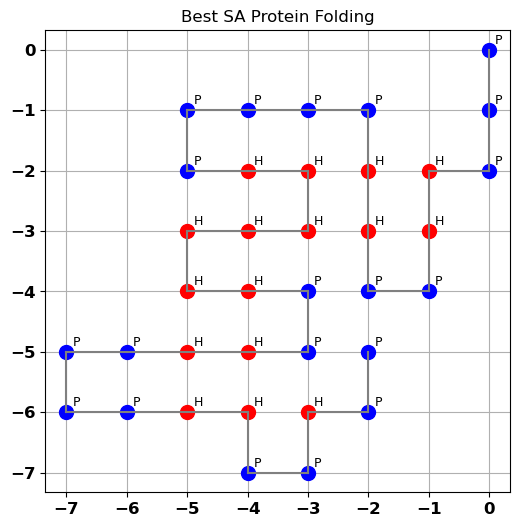

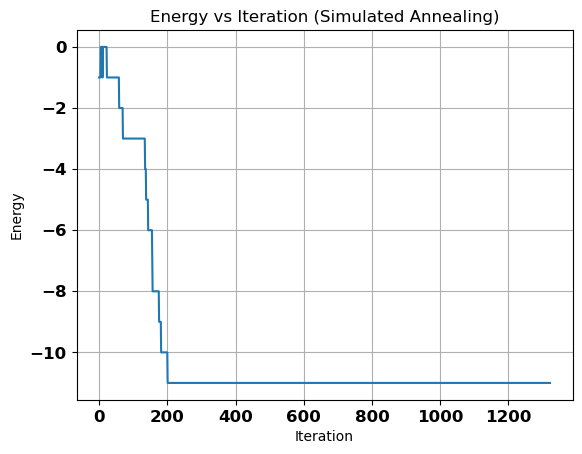

In [1]:
# -*- coding: utf-8 -*-
"""
Created on Fri Aug  1 14:41:16 2025

@author: Yassin
"""

import random
import matplotlib.pyplot as plt
import math
import sys
import time

# Directions for 2D lattice: Up, Right, Down, Left
square_directions = [(0, 1), (1, 0), (0, -1), (-1, 0)]

# Known optimal energies for reference
optimal_2d = {
    20: -9, 
    24: -9, 
    25: -8, 
    36: -14,
    48: -23, 
    50: -21, 
    60: -36,
    64: -42, 
    85: -53
}

# Coordinates
def get_coordinates(square_direction):
    x, y = 0, 0
    coords = [(x, y)]
    for dx, dy in square_direction:
        x += dx
        y += dy
        coords.append((x, y))
    return coords

# Energy Function
def calculate_energy(sequence, coords):
    energy = 0
    positions = {coord: i for i, coord in enumerate(coords)}
    for i in range(len(sequence)):
        if sequence[i] != 'H':
            continue
        x, y = coords[i]
        for dx, dy in square_directions:
            nx, ny = x + dx, y + dy
            j = positions.get((nx, ny))
            if j is not None and sequence[j] == 'H' and abs(i - j) > 1:
                energy -= 1
    return energy // 2

# Mutation
def mutate(square_direction):
    new_direction = square_direction[:]
    i = random.randint(0, len(square_direction) - 1)
    new_dir = random.choice(square_directions)
    while new_dir == new_direction[i]:
        new_dir = random.choice(square_directions)
    new_direction[i] = new_dir
    return new_direction

# Main Block Simulated Annealing 
def simulated_annealing(sequence, iterations, T0, alpha):
    # Ensure valid SAW initial direction
    while True:
        square_direction = random.choices(square_directions, k=len(sequence) - 1)
        coords = get_coordinates(square_direction)
        if len(set(coords)) == len(coords):
            break

    best_coords = coords
    best_energy = calculate_energy(sequence, coords)
    energy_list = [best_energy]
    T = T0

    for _ in range(iterations):
        new_direction = mutate(square_direction)
        new_coords = get_coordinates(new_direction)

        if len(set(new_coords)) != len(new_coords):
            continue  # ensure SAW

        new_energy = calculate_energy(sequence, new_coords)

        # Optional sanity check (based on known optimum)
        known_min = optimal_2d.get(len(sequence), -100)
        if new_energy < known_min - 2:
            print(f"WARNING: Energy too low ({new_energy}) — skipping")
            continue

        delta_E = new_energy - best_energy
        if delta_E < 0 or random.random() < math.exp(-delta_E / T):
            square_direction = new_direction
            best_coords = new_coords
            best_energy = new_energy

        energy_list.append(best_energy)
        T *= alpha

    return best_coords, best_energy, energy_list

# Plot
def plot_energy_curve(energy_log):
    plt.plot(energy_log)
    plt.title("Energy vs Iteration (Simulated Annealing)")
    plt.xlabel("Iteration")
    plt.ylabel("Energy")
    plt.xticks(fontsize = 12, fontweight = 'bold')
    plt.yticks(fontsize = 12, fontweight = 'bold')
    plt.grid(True)
    plt.show()


# Fold Visualization
def visualize_fold(coords, sequence, title="Protein Folding"):
    xs, ys = zip(*coords)
    plt.figure(figsize=(6, 6))
    for i, (x, y) in enumerate(coords):
        color = 'red' if sequence[i] == 'H' else 'blue'
        plt.plot(x, y, 'o', color=color, markersize=10)
        plt.text(x + 0.1, y + 0.1, sequence[i], fontsize=9)
        if i > 0:
            x0, y0 = coords[i - 1]
            plt.plot([x0, x], [y0, y], 'gray')
    plt.axis('equal')
    plt.xticks(fontsize = 12, fontweight = 'bold')
    plt.yticks(fontsize = 12, fontweight = 'bold')
    plt.grid(True)
    plt.title(title)
    plt.show()


# Main Program
if __name__ == "__main__":
    sequence = "".join(input("Enter the sequence (only H and P): ").upper().split())

    if not sequence or any(c not in "HP" for c in sequence):
        print("Invalid sequence. Use only 'H' and 'P'.")
        sys.exit()
        
    initial_temperature = 1.0
    cooling_rate = 0.95     # Slower cooling for better folding (α = cooling rate)
    iterations = 5000        # Faster
    runs = 50               # More runs for better chance
    best_overall_energy = float('inf')
    best_overall_coords = None
    best_overall_log = None
    best_run_index = -1

    lattice_type = int(input("Enter 1 for square 2D lattice: ").strip())
    if lattice_type != 1:
        print("Thank you. Exiting.")
        sys.exit()

    print("\nSimulated Annealing on 2D Square Lattice")
    
    length = len(sequence)
    if length in optimal_2d:
        print("2D square Lattice: Loading...")
        
    start_time = time.time()
    
    for r in range(runs):
        coords, energy, log = simulated_annealing(sequence, iterations, initial_temperature, cooling_rate)
        if energy < best_overall_energy:
            best_overall_energy = energy
            best_overall_coords = coords
            best_overall_log = log
            best_run_index = r + 1
            
    end_time = time.time()
    total_time = (end_time - start_time) / 60
      
    print("Found in Run:", best_run_index)
    print("\nBest SA Energy Across All Runs:", best_overall_energy)
    
    if length in optimal_2d:
        optimal = optimal_2d[length]
        deviation = best_overall_energy - optimal
        print("Known Optimal Energy:", optimal)
        print("Deviation from Optimal:", deviation)
    else:
        print("No known optimal energy for sequence length:", length)
        
    print(f"\nTotal Runtime: {total_time:.3f} minutes")
    
    visualize_fold(best_overall_coords, sequence, title="Best SA Protein Folding")
    plot_energy_curve(best_overall_log)
    
    

### **Id 5 Sequence**

In [ ]:
# -*- coding: utf-8 -*-
"""
Created on Fri Aug  1 14:41:16 2025

@author: Yassin
"""

import random
import matplotlib.pyplot as plt
import math
import sys
import time

# Directions for 2D lattice: Up, Right, Down, Left
square_directions = [(0, 1), (1, 0), (0, -1), (-1, 0)]

# Known optimal energies for reference
optimal_2d = {
    20: -9, 
    24: -9, 
    25: -8, 
    36: -14,
    48: -23, 
    50: -21, 
    60: -36,
    64: -42, 
    85: -53
}

# Coordinates
def get_coordinates(square_direction):
    x, y = 0, 0
    coords = [(x, y)]
    for dx, dy in square_direction:
        x += dx
        y += dy
        coords.append((x, y))
    return coords

# Energy Function
def calculate_energy(sequence, coords):
    energy = 0
    positions = {coord: i for i, coord in enumerate(coords)}
    for i in range(len(sequence)):
        if sequence[i] != 'H':
            continue
        x, y = coords[i]
        for dx, dy in square_directions:
            nx, ny = x + dx, y + dy
            j = positions.get((nx, ny))
            if j is not None and sequence[j] == 'H' and abs(i - j) > 1:
                energy -= 1
    return energy // 2

# Mutation
def mutate(square_direction):
    new_direction = square_direction[:]
    i = random.randint(0, len(square_direction) - 1)
    new_dir = random.choice(square_directions)
    while new_dir == new_direction[i]:
        new_dir = random.choice(square_directions)
    new_direction[i] = new_dir
    return new_direction

# Main Block Simulated Annealing 
def simulated_annealing(sequence, iterations, T0, alpha):
    # Ensure valid SAW initial direction
    while True:
        square_direction = random.choices(square_directions, k=len(sequence) - 1)
        coords = get_coordinates(square_direction)
        if len(set(coords)) == len(coords):
            break

    best_coords = coords
    best_energy = calculate_energy(sequence, coords)
    energy_list = [best_energy]
    T = T0

    for _ in range(iterations):
        new_direction = mutate(square_direction)
        new_coords = get_coordinates(new_direction)

        if len(set(new_coords)) != len(new_coords):
            continue  # ensure SAW

        new_energy = calculate_energy(sequence, new_coords)

        # Optional sanity check (based on known optimum)
        known_min = optimal_2d.get(len(sequence), -100)
        if new_energy < known_min - 2:
            print(f"WARNING: Energy too low ({new_energy}) — skipping")
            continue

        delta_E = new_energy - best_energy
        if delta_E < 0 or random.random() < math.exp(-delta_E / T):
            square_direction = new_direction
            best_coords = new_coords
            best_energy = new_energy

        energy_list.append(best_energy)
        T *= alpha

    return best_coords, best_energy, energy_list

# Plot
def plot_energy_curve(energy_log):
    plt.plot(energy_log)
    plt.title("Energy vs Iteration (Simulated Annealing)")
    plt.xlabel("Iteration")
    plt.ylabel("Energy")
    plt.xticks(fontsize = 12, fontweight = 'bold')
    plt.yticks(fontsize = 12, fontweight = 'bold')
    plt.grid(True)
    plt.show()


# Fold Visualization
def visualize_fold(coords, sequence, title="Protein Folding"):
    xs, ys = zip(*coords)
    plt.figure(figsize=(6, 6))
    for i, (x, y) in enumerate(coords):
        color = 'red' if sequence[i] == 'H' else 'blue'
        plt.plot(x, y, 'o', color=color, markersize=10)
        plt.text(x + 0.1, y + 0.1, sequence[i], fontsize=9)
        if i > 0:
            x0, y0 = coords[i - 1]
            plt.plot([x0, x], [y0, y], 'gray')
    plt.axis('equal')
    plt.xticks(fontsize = 12, fontweight = 'bold')
    plt.yticks(fontsize = 12, fontweight = 'bold')
    plt.grid(True)
    plt.title(title)
    plt.show()


# Main Program
if __name__ == "__main__":
    sequence = "".join(input("Enter the sequence (only H and P): ").upper().split())

    if not sequence or any(c not in "HP" for c in sequence):
        print("Invalid sequence. Use only 'H' and 'P'.")
        sys.exit()
        
    initial_temperature = 1.0
    cooling_rate = 0.95     # Slower cooling for better folding (α = cooling rate)
    iterations = 5000        # Faster
    runs = 50               # More runs for better chance
    best_overall_energy = float('inf')
    best_overall_coords = None
    best_overall_log = None
    best_run_index = -1

    lattice_type = int(input("Enter 1 for square 2D lattice: ").strip())
    if lattice_type != 1:
        print("Thank you. Exiting.")
        sys.exit()

    print("\nSimulated Annealing on 2D Square Lattice")
    
    length = len(sequence)
    if length in optimal_2d:
        print("2D square Lattice: Loading...")
        
    start_time = time.time()
    
    for r in range(runs):
        coords, energy, log = simulated_annealing(sequence, iterations, initial_temperature, cooling_rate)
        if energy < best_overall_energy:
            best_overall_energy = energy
            best_overall_coords = coords
            best_overall_log = log
            best_run_index = r + 1
            
    end_time = time.time()
    total_time = (end_time - start_time) / 60
      
    print("Found in Run:", best_run_index)
    print("\nBest SA Energy Across All Runs:", best_overall_energy)
    
    if length in optimal_2d:
        optimal = optimal_2d[length]
        deviation = best_overall_energy - optimal
        print("Known Optimal Energy:", optimal)
        print("Deviation from Optimal:", deviation)
    else:
        print("No known optimal energy for sequence length:", length)
        
    print(f"\nTotal Runtime: {total_time:.3f} minutes")
    
    visualize_fold(best_overall_coords, sequence, title="Best SA Protein Folding")
    plot_energy_curve(best_overall_log)
    
    

### **Id 6 Sequence**

In [ ]:
# -*- coding: utf-8 -*-
"""
Created on Fri Aug  1 14:41:16 2025

@author: Yassin
"""

import random
import matplotlib.pyplot as plt
import math
import sys
import time

# Directions for 2D lattice: Up, Right, Down, Left
square_directions = [(0, 1), (1, 0), (0, -1), (-1, 0)]

# Known optimal energies for reference
optimal_2d = {
    20: -9, 
    24: -9, 
    25: -8, 
    36: -14,
    48: -23, 
    50: -21, 
    60: -36,
    64: -42, 
    85: -53
}

# Coordinates
def get_coordinates(square_direction):
    x, y = 0, 0
    coords = [(x, y)]
    for dx, dy in square_direction:
        x += dx
        y += dy
        coords.append((x, y))
    return coords

# Energy Function
def calculate_energy(sequence, coords):
    energy = 0
    positions = {coord: i for i, coord in enumerate(coords)}
    for i in range(len(sequence)):
        if sequence[i] != 'H':
            continue
        x, y = coords[i]
        for dx, dy in square_directions:
            nx, ny = x + dx, y + dy
            j = positions.get((nx, ny))
            if j is not None and sequence[j] == 'H' and abs(i - j) > 1:
                energy -= 1
    return energy // 2

# Mutation
def mutate(square_direction):
    new_direction = square_direction[:]
    i = random.randint(0, len(square_direction) - 1)
    new_dir = random.choice(square_directions)
    while new_dir == new_direction[i]:
        new_dir = random.choice(square_directions)
    new_direction[i] = new_dir
    return new_direction

# Main Block Simulated Annealing 
def simulated_annealing(sequence, iterations, T0, alpha):
    # Ensure valid SAW initial direction
    while True:
        square_direction = random.choices(square_directions, k=len(sequence) - 1)
        coords = get_coordinates(square_direction)
        if len(set(coords)) == len(coords):
            break

    best_coords = coords
    best_energy = calculate_energy(sequence, coords)
    energy_list = [best_energy]
    T = T0

    for _ in range(iterations):
        new_direction = mutate(square_direction)
        new_coords = get_coordinates(new_direction)

        if len(set(new_coords)) != len(new_coords):
            continue  # ensure SAW

        new_energy = calculate_energy(sequence, new_coords)

        # Optional sanity check (based on known optimum)
        known_min = optimal_2d.get(len(sequence), -100)
        if new_energy < known_min - 2:
            print(f"WARNING: Energy too low ({new_energy}) — skipping")
            continue

        delta_E = new_energy - best_energy
        if delta_E < 0 or random.random() < math.exp(-delta_E / T):
            square_direction = new_direction
            best_coords = new_coords
            best_energy = new_energy

        energy_list.append(best_energy)
        T *= alpha

    return best_coords, best_energy, energy_list

# Plot
def plot_energy_curve(energy_log):
    plt.plot(energy_log)
    plt.title("Energy vs Iteration (Simulated Annealing)")
    plt.xlabel("Iteration")
    plt.ylabel("Energy")
    plt.xticks(fontsize = 12, fontweight = 'bold')
    plt.yticks(fontsize = 12, fontweight = 'bold')
    plt.grid(True)
    plt.show()


# Fold Visualization
def visualize_fold(coords, sequence, title="Protein Folding"):
    xs, ys = zip(*coords)
    plt.figure(figsize=(6, 6))
    for i, (x, y) in enumerate(coords):
        color = 'red' if sequence[i] == 'H' else 'blue'
        plt.plot(x, y, 'o', color=color, markersize=10)
        plt.text(x + 0.1, y + 0.1, sequence[i], fontsize=9)
        if i > 0:
            x0, y0 = coords[i - 1]
            plt.plot([x0, x], [y0, y], 'gray')
    plt.axis('equal')
    plt.xticks(fontsize = 12, fontweight = 'bold')
    plt.yticks(fontsize = 12, fontweight = 'bold')
    plt.grid(True)
    plt.title(title)
    plt.show()


# Main Program
if __name__ == "__main__":
    sequence = "".join(input("Enter the sequence (only H and P): ").upper().split())

    if not sequence or any(c not in "HP" for c in sequence):
        print("Invalid sequence. Use only 'H' and 'P'.")
        sys.exit()
        
    initial_temperature = 1.0
    cooling_rate = 0.95     # Slower cooling for better folding (α = cooling rate)
    iterations = 5000        # Faster
    runs = 50               # More runs for better chance
    best_overall_energy = float('inf')
    best_overall_coords = None
    best_overall_log = None
    best_run_index = -1

    lattice_type = int(input("Enter 1 for square 2D lattice: ").strip())
    if lattice_type != 1:
        print("Thank you. Exiting.")
        sys.exit()

    print("\nSimulated Annealing on 2D Square Lattice")
    
    length = len(sequence)
    if length in optimal_2d:
        print("2D square Lattice: Loading...")
        
    start_time = time.time()
    
    for r in range(runs):
        coords, energy, log = simulated_annealing(sequence, iterations, initial_temperature, cooling_rate)
        if energy < best_overall_energy:
            best_overall_energy = energy
            best_overall_coords = coords
            best_overall_log = log
            best_run_index = r + 1
            
    end_time = time.time()
    total_time = (end_time - start_time) / 60
      
    print("Found in Run:", best_run_index)
    print("\nBest SA Energy Across All Runs:", best_overall_energy)
    
    if length in optimal_2d:
        optimal = optimal_2d[length]
        deviation = best_overall_energy - optimal
        print("Known Optimal Energy:", optimal)
        print("Deviation from Optimal:", deviation)
    else:
        print("No known optimal energy for sequence length:", length)
        
    print(f"\nTotal Runtime: {total_time:.3f} minutes")
    
    visualize_fold(best_overall_coords, sequence, title="Best SA Protein Folding")
    plot_energy_curve(best_overall_log)
    
    